In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall

import os
%matplotlib inline

from os import listdir
os.environ['KMP_DUPLICATE_LIB_OK']='True'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
input_dir = "Lab1\simpsons_dataset"
PATH = "Lab1\data"

#splitfolders.ratio(input_dir, output=PATH,seed=1332, ratio=(.6, 0.2,0.2))

image_size = (34, 34, 3)
epochs = 15
classes = os.listdir(input_dir)
print(len(classes))
print((classes))

transform = transforms.Compose(
    [transforms.Resize((34,34)), 
     transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) #поиграть, посмотреть на что влияет brg

42
['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(len(classes))
#загружаем датасет, называем классы

Files already downloaded and verified
Files already downloaded and verified
10


In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.drop(F.relu(self.fc1(x)))
        x = self.drop(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


net2 = Net2()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)
optimizer2 = optim.SGD(net2.parameters(), lr = 0.001, momentum=0.9)

In [7]:
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    train_loss, correct_train = 0, 0
    for i, data in tqdm(enumerate(trainloader, 0)):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            train_losses.append(running_loss / 1000)
            running_loss = 0.0
    

print('Finished Training')

992it [00:08, 110.95it/s]

[1,  1000] loss: 2.109


1000it [00:08, 112.76it/s]
996it [00:08, 113.33it/s]

[2,  1000] loss: 1.701


1000it [00:08, 112.77it/s]
997it [00:08, 114.44it/s]

[3,  1000] loss: 1.554


1000it [00:08, 111.88it/s]
995it [00:13, 59.16it/s] 

[4,  1000] loss: 1.468


1000it [00:14, 69.69it/s]
1000it [00:14, 74.08it/s]

[5,  1000] loss: 1.397


1000it [00:14, 68.75it/s]
998it [00:13, 67.31it/s]

[6,  1000] loss: 1.341


1000it [00:14, 70.14it/s]
993it [00:13, 73.77it/s] 

[7,  1000] loss: 1.294


1000it [00:14, 71.13it/s]
993it [00:14, 73.89it/s] 

[8,  1000] loss: 1.252


1000it [00:14, 69.21it/s]
997it [00:14, 68.52it/s]

[9,  1000] loss: 1.208


1000it [00:14, 69.85it/s]
999it [00:14, 69.72it/s]

[10,  1000] loss: 1.175


1000it [00:14, 69.19it/s]
997it [00:14, 57.64it/s] 

[11,  1000] loss: 1.137


1000it [00:14, 68.19it/s]
996it [00:14, 63.56it/s] 

[12,  1000] loss: 1.112


1000it [00:14, 67.88it/s]
996it [00:15, 56.39it/s]

[13,  1000] loss: 1.082


1000it [00:15, 62.66it/s]
997it [00:15, 49.22it/s]

[14,  1000] loss: 1.060


1000it [00:15, 63.94it/s]
994it [00:14, 71.36it/s]

[15,  1000] loss: 1.029


1000it [00:15, 66.47it/s]

Finished Training


In [8]:
train_losses2 = []

for epoch in range(epochs):
    running_loss = 0.0
    train_loss, correct_train = 0, 0
    for i, data in tqdm(enumerate(trainloader, 0)):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            train_losses2.append(running_loss / 1000)
            running_loss = 0.0

print('Finished Training')

993it [00:14, 73.57it/s]

[1,  1000] loss: 2.237


1000it [00:14, 68.02it/s]
996it [00:14, 64.85it/s]

[2,  1000] loss: 2.057


1000it [00:14, 68.85it/s]
999it [00:14, 74.25it/s]

[3,  1000] loss: 1.863


1000it [00:14, 68.79it/s]
996it [00:14, 63.59it/s]

[4,  1000] loss: 1.757


1000it [00:14, 67.90it/s]
1000it [00:14, 72.05it/s]

[5,  1000] loss: 1.696


1000it [00:14, 69.27it/s]
997it [00:14, 69.44it/s]

[6,  1000] loss: 1.634


1000it [00:14, 67.86it/s]
994it [00:14, 74.71it/s]

[7,  1000] loss: 1.589


1000it [00:15, 66.00it/s]
1000it [00:14, 67.84it/s]

[8,  1000] loss: 1.551


1000it [00:14, 69.05it/s]
1000it [00:14, 75.90it/s]

[9,  1000] loss: 1.519


1000it [00:14, 67.55it/s]
1000it [00:22, 41.83it/s]

[10,  1000] loss: 1.501


1000it [00:23, 43.13it/s]
998it [00:24, 40.88it/s]

[11,  1000] loss: 1.476


1000it [00:24, 40.91it/s]
999it [00:23, 41.85it/s]

[12,  1000] loss: 1.449


1000it [00:24, 41.38it/s]
995it [00:24, 42.00it/s]

[13,  1000] loss: 1.430


1000it [00:24, 40.44it/s]
1000it [00:24, 40.33it/s]

[14,  1000] loss: 1.417


1000it [00:24, 40.83it/s]
1000it [00:23, 42.52it/s]

[15,  1000] loss: 1.392


1000it [00:24, 41.19it/s]

Finished Training


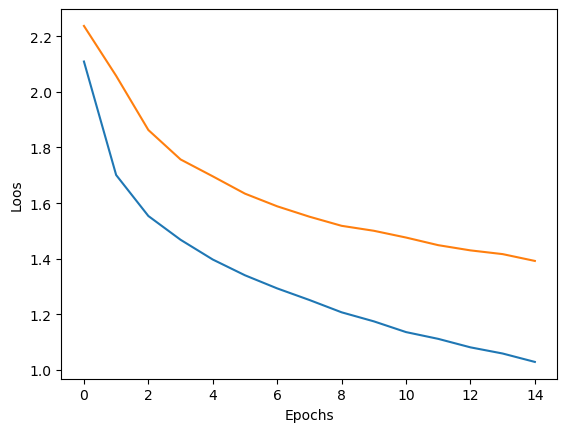

In [9]:
plt.plot([i for i in range(0, epochs)], train_losses) #без дропа, синий
plt.plot([i for i in range(0, epochs)], train_losses2) #с дропом, оранжевый
plt.ylabel('Loos')
plt.xlabel('Epochs')
plt.show()

График без дропаута обучается плавно на протяжении всего процесса, что позволит ему рассмотреть больше деталей в классах и лучше работать с новыми данными.
График без дропаута резко падает вниз,  быстро обучается, после чего обучение замедляется. Это может привести к тому, что модель будет тупой на новых данных:(

# Точность

С дропом

In [18]:
#точность
correct = 0
total = 0

recall = MulticlassRecall(num_classes=10, average=None)
precision = MulticlassPrecision(num_classes=10, average=None)
recall.to(device)
precision.to(device)

with torch.no_grad():
    net.eval()
    for data in testloader:
        inputs = data[0].to(device)
        labels = data[1].to(device)
        outputs = net(inputs)
        __, predicted = torch.max(outputs.data, 1)
        recall.update(outputs, labels)
        precision.update(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f"Accuracy: {100 * correct/total:.0f}%")
reca = sum(recall.compute())/10*100
preci = sum(precision.compute())/10*100
f1 = 2 * ((reca*preci)/(reca+preci))
print(f'Recall: {reca:.2f}%\nPrecision: {preci:.2f}% \nF1: {f1:.2f}%')

Accuracy: 61%
Recall: 60.72%
Precision: 60.21% 
F1: 60.46%


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                class_correct[label] += 1
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 68 %
Accuracy of  bird : 43 %
Accuracy of   cat : 35 %
Accuracy of  deer : 54 %
Accuracy of   dog : 50 %
Accuracy of  frog : 73 %
Accuracy of horse : 67 %
Accuracy of  ship : 78 %
Accuracy of truck : 68 %


Без дропа

In [20]:
#точность
correct = 0
total = 0

recall = MulticlassRecall(num_classes=10, average=None)
precision = MulticlassPrecision(num_classes=10, average=None)
recall.to(device)
precision.to(device)

with torch.no_grad():
    net.eval()
    for data in testloader:
        inputs = data[0].to(device)
        labels = data[1].to(device)
        outputs = net2(inputs)
        __, predicted = torch.max(outputs.data, 1)
        recall.update(outputs, labels)
        precision.update(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f"Accuracy: {100 * correct/total:.0f}%")
reca = sum(recall.compute())/10*100
preci = sum(precision.compute())/10*100
f1 = 2 * ((reca*preci)/(reca+preci))
print(f'Recall: {reca:.2f}%\nPrecision: {preci:.2f}% \nF1: {f1:.2f}%')

Accuracy: 54%
Recall: 53.99%
Precision: 53.78% 
F1: 53.88%


In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                class_correct[label] += 1
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 75 %
Accuracy of  bird : 32 %
Accuracy of   cat : 26 %
Accuracy of  deer : 41 %
Accuracy of   dog : 41 %
Accuracy of  frog : 76 %
Accuracy of horse : 64 %
Accuracy of  ship : 68 %
Accuracy of truck : 59 %
